In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv("AppleStore.csv")

In [3]:
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
df.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [5]:
for col_name in df.columns:
    if df[col_name].dtype == 'object':
        unique_cat = len(df[col_name].unique())
        print('Atribut {col_name} ima {unique_cat} kategorija'.format(col_name = col_name, unique_cat=unique_cat))

Atribut track_name ima 7195 kategorija
Atribut currency ima 1 kategorija
Atribut ver ima 1590 kategorija
Atribut cont_rating ima 4 kategorija
Atribut prime_genre ima 23 kategorija


In [6]:
df.drop('currency', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [7]:
print(df['track_name'].value_counts().sort_values(ascending=False))

VR Roller Coaster      2
Mannequin Challenge    2
Watch Games            1
Sparkwave              1
No Limit Racer         1
                      ..
シロクマ先生のゆるくない英文法        1
Microsoft OneNote      1
Pull My Tongue         1
Twist                  1
你我贷理财-P2P理财管家          1
Name: track_name, Length: 7195, dtype: int64


In [8]:
df.head()

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,Bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [9]:
df.drop(['track_name', 'ver'], axis=1, inplace=True)

In [10]:
df['cont_rating'].unique()

array(['4+', '12+', '17+', '9+'], dtype=object)

In [11]:
df['cont_rating'].replace({
    '4+': 0,
    '9+': 1,
    '12+': 2,
    '17+': 3,
}, inplace=True)

In [12]:
df['prime_genre'].unique()

array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       'Sports', 'Business', 'Health & Fitness', 'Entertainment',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
      dtype=object)

In [13]:
x = df['prime_genre'].value_counts()
x

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

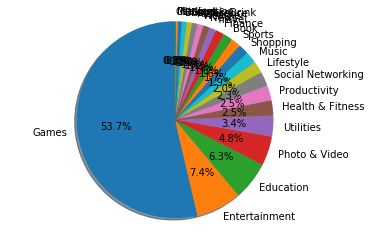

In [14]:
ganres = ['Games', 'Entertainment', 'Education', 'Photo & Video', 'Utilities', 'Health & Fitness' ,
         'Productivity', 'Social Networking', 'Lifestyle', 'Music', 'Shopping', 'Sports', 'Book', 
         'Finance', 'Travel', 'News', 'Weather', 'Reference', 'Food & Drink', 'Business', 
         'Navigation', 'Medical', 'Catalogs']
parts = df['prime_genre'].value_counts()
fig1, ax1 = plt.subplots()
plt.pie(parts, labels = ganres, shadow = True,
        startangle=90, autopct = '%1.1f%%')
ax1.axis('equal')
plt.savefig('zanrovi.jpg')
plt.show()

In [15]:
df['prime_genre'] = [x if ((x == 'Games') or (x == 'Entertainment') or (x == 'Education') or (x == 'Photo & Video')) else 'Other' for x in df['prime_genre']]

In [16]:
df['prime_genre'].value_counts()

Games            3862
Other            1998
Entertainment     535
Education         453
Photo & Video     349
Name: prime_genre, dtype: int64

In [17]:
df['prime_genre'].replace({
    'Games' : 0, 
    'Entertainment' : 1,
    'Education': 2, 
    'Photo & Video': 3,
    'Other': 4
}, inplace=True)

In [18]:
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,100788224,3.99,21292,26,4.0,4.5,0,0,38,5,10,1
1,158578688,0.00,161065,26,4.0,3.5,0,4,37,5,23,1
2,100524032,0.00,188583,2822,3.5,4.5,0,4,37,5,3,1
3,128512000,0.00,262241,649,4.0,4.5,2,4,37,5,9,1
4,92774400,0.00,985920,5320,4.5,5.0,0,4,37,5,45,1


In [19]:
df.corr()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
size_bytes,1.000000,0.182392,0.004486,0.006337,0.066256,0.086075,0.136747,-0.239325,-0.118347,0.152697,0.004614,-0.150418
price,0.182392,1.000000,-0.039044,-0.018012,0.046601,0.025173,-0.031203,0.052580,-0.115361,0.066100,-0.006713,-0.029942
rating_count_tot,0.004486,-0.039044,1.000000,0.163645,0.083310,0.088744,0.010200,0.005642,0.008832,0.015734,0.137675,-0.000982
rating_count_ver,0.006337,-0.018012,0.163645,1.000000,0.068754,0.077840,0.002994,-0.020179,0.037951,0.024333,0.013287,0.006460
user_rating,0.066256,0.046601,0.083310,0.068754,1.000000,0.774140,-0.098560,-0.101700,-0.042451,0.265671,0.170976,0.069816
user_rating_ver,0.086075,0.025173,0.088744,0.077840,0.774140,1.000000,-0.122183,-0.163797,-0.018901,0.275737,0.175580,0.050094
cont_rating,0.136747,-0.031203,0.010200,0.002994,-0.098560,-0.122183,1.000000,-0.019775,0.023558,-0.109707,-0.067859,-0.047733
prime_genre,-0.239325,0.052580,0.005642,-0.020179,-0.101700,-0.163797,-0.019775,1.000000,-0.173610,-0.337081,0.114502,0.007438
sup_devices.num,-0.118347,-0.115361,0.008832,0.037951,-0.042451,-0.018901,0.023558,-0.173610,1.000000,-0.037728,-0.041681,-0.037109
ipadSc_urls.num,0.152697,0.066100,0.015734,0.024333,0.265671,0.275737,-0.109707,-0.337081,-0.037728,1.000000,0.088378,0.071901


In [20]:
df.corr()['user_rating'].sort_values(ascending=False)

user_rating         1.000000
user_rating_ver     0.774140
ipadSc_urls.num     0.265671
lang.num            0.170976
rating_count_tot    0.083310
vpp_lic             0.069816
rating_count_ver    0.068754
size_bytes          0.066256
price               0.046601
sup_devices.num    -0.042451
cont_rating        -0.098560
prime_genre        -0.101700
Name: user_rating, dtype: float64

In [21]:
cene = df[df['price'] > 50]
cene

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
115,723764224,249.99,773,10,4.0,3.5,0,2,37,5,3,1
162,144412672,74.99,927,3,3.5,2.5,0,4,37,2,21,1
1136,425919488,59.99,294,130,4.5,5.0,0,2,38,5,1,1
1479,583263232,299.99,41,0,4.0,0.0,0,2,24,5,1,1
2181,174737408,59.99,29,0,4.5,0.0,0,2,24,5,1,1
2568,106429440,99.99,71,0,4.5,0.0,0,4,37,5,14,1
3238,63974400,59.99,100,4,4.0,4.5,0,4,37,5,12,1


In [22]:
df.describe()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,0.717382,1.456162,37.361817,3.707100,5.434903,0.993053
std,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,1.020983,1.756249,3.737715,1.986005,7.919593,0.083066
min,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,0.000000,0.000000,37.000000,3.000000,1.000000,1.000000
50%,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,0.000000,0.000000,37.000000,5.000000,1.000000,1.000000
75%,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,1.000000,4.000000,38.000000,5.000000,8.000000,1.000000
max,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,3.000000,4.000000,47.000000,5.000000,75.000000,1.000000


In [23]:
df['user_rating'].unique()

array([4. , 3.5, 4.5, 5. , 3. , 2. , 2.5, 0. , 1.5, 1. ])

In [24]:
df['user_rating'].replace({
    0. : int(0),
    1. : int(1),
    1.5 : int(2),
    2. : int(3),
    2.5: int(4),
    3. : int(5),
    3.5: int(6),
    4. : int(7),
    4.5: int(8),
    5.: int(9)
}, inplace=True)

In [25]:
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,100788224,3.99,21292,26,7.0,4.5,0,0,38,5,10,1
1,158578688,0.00,161065,26,7.0,3.5,0,4,37,5,23,1
2,100524032,0.00,188583,2822,6.0,4.5,0,4,37,5,3,1
3,128512000,0.00,262241,649,7.0,4.5,2,4,37,5,9,1
4,92774400,0.00,985920,5320,8.0,5.0,0,4,37,5,45,1


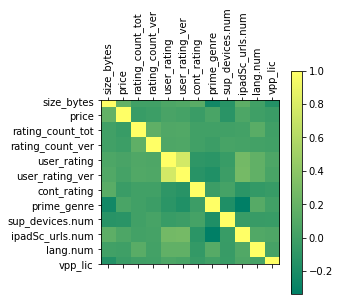

In [26]:
plt.matshow(df.corr(), cmap='summer')
plt.colorbar()

plt.xticks(list(range(len(df.columns))), df.columns, rotation = 'vertical')
plt.yticks(list(range(len(df.columns))), df.columns, rotation = 'horizontal')

plt.savefig('corelation.jpg')
plt.show()

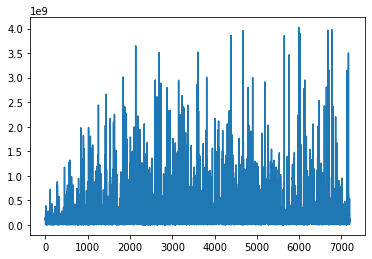

In [27]:
plt.plot(df.size_bytes.values)

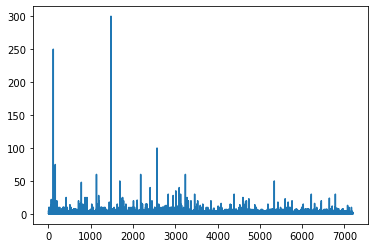

In [28]:
plt.plot(df.price.values)
plt.savefig('price.jpg')

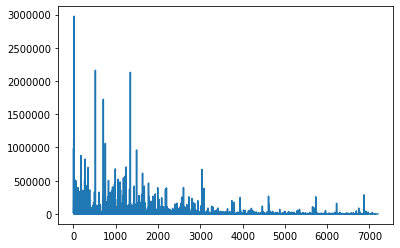

In [29]:
plt.plot(df.rating_count_tot.values)

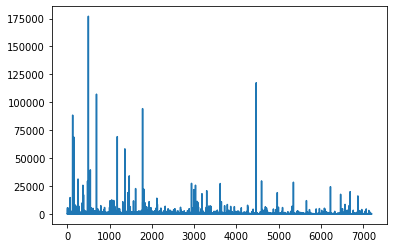

In [30]:
plt.plot(df.rating_count_ver.values)

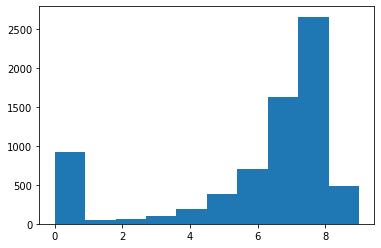

In [34]:
plt.hist(df.user_rating.values)
plt.savefig('user_rating.jpg')

In [32]:
df['user_rating'].value_counts()

8.0    2663
7.0    1626
0.0     929
6.0     702
9.0     492
5.0     383
4.0     196
3.0     106
2.0      56
1.0      44
Name: user_rating, dtype: int64

(array([1443.,    0.,  125.,   74.,  136.,  176.,  304.,  533., 1237.,
        3169.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

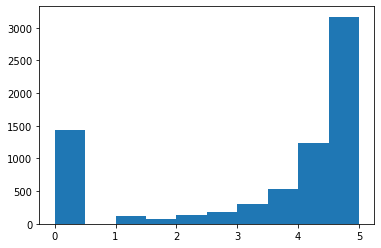

In [135]:
plt.hist(df.user_rating_ver.values)

(array([3862.,    0.,  535.,    0.,    0.,  453.,    0.,  349.,    0.,
        1998.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

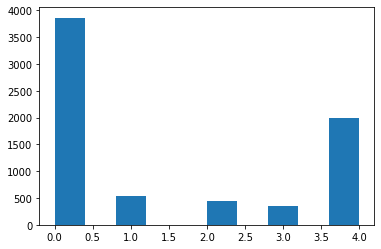

In [136]:
plt.hist(df.prime_genre.values)

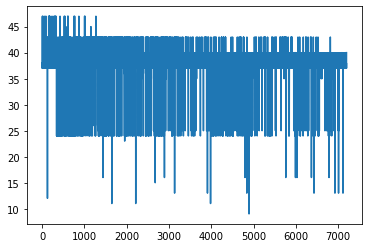

In [168]:
plt.plot(df['sup_devices.num'].values)

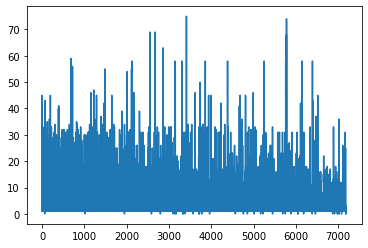

In [169]:
plt.plot(df['lang.num'].values)

In [167]:
jezici = df[df['lang.num'] < 0]
jezici

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic


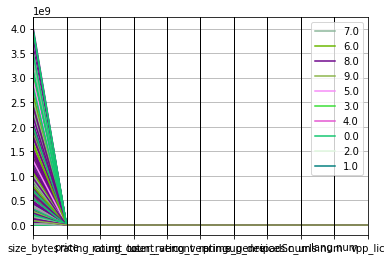

In [170]:
pd.plotting.parallel_coordinates(df, 'user_rating')
plt.show()

In [171]:
df.to_csv('novo_prep.csv', index=False)